In [ ]:
! pip install scikit-learn pandas numpy matplotlib seaborn scipy tqdm
#competitor ke lab se uthaya
! mkdir data
! wget https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/04%20-%20Unsupervised%20Learning/data/LKB_P.csv -O data/LKB_P.csv
! wget https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/04%20-%20Unsupervised%20Learning/data/Dimer_LKB_P.csv -O data/Dimer_LKB_P.csv

--2025-09-28 10:13:19--  https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/04%20-%20Unsupervised%20Learning/data/LKB_P.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70133 (68K) [text/plain]
Saving to: ‘data/LKB_P.csv’

data/LKB_P.csv      100%[===================>]  68.49K  --.-KB/s    in 0.01s   

2025-09-28 10:13:19 (5.29 MB/s) - ‘data/LKB_P.csv’ saved [70133/70133]

--2025-09-28 10:13:19--  https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/04%20-%20Unsupervised%20Learning/data/Dimer_LKB_P.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load ligand information
ligands = pd.read_csv('data/LKB_P.csv', sep=';')

ligands.head()

,No.,Type,E(HOMO),E(LUMO),He8_steric,PA,Q(B),BE(B),P-B,DP-A(B),...,BE(Pt),P-Pt,DP-A(Pt),DA-P-A(Pt),<(H3P)Pt(PH3),S4',PC1,PC2,PC3,PC4
0,1,R,-0.24636,-0.00029,2.30,190.60,-0.590,26.10,1.941,-0.013,...,8.80,2.328,-0.001,1.5,109.4,66.9,-3.078,0.798,6.079,-1.066
1,2,R,-0.19045,0.03268,3.00,233.00,-0.680,39.20,1.926,-0.028,...,12.90,2.331,-0.010,1.3,107.5,39.4,1.602,3.976,1.536,0.090
2,3,R,-0.27742,-0.05837,3.00,182.30,-0.560,26.30,1.915,-0.002,...,22.80,2.250,0.008,-0.1,109.0,52.2,-7.226,-3.302,2.929,2.032
3,4,R,-0.26620,-0.11270,20.66,194.04,-0.538,22.51,1.924,-0.005,...,16.58,2.260,0.046,-2.4,106.6,28.7,-6.715,-9.291,1.348,-0.823
4,5,R,-0.18723,0.02584,6.00,239.10,-0.680,39.00,1.934,-0.027,...,17.10,2.338,-0.010,1.6,107.4,39.0,2.280,3.408,1.584,0.168


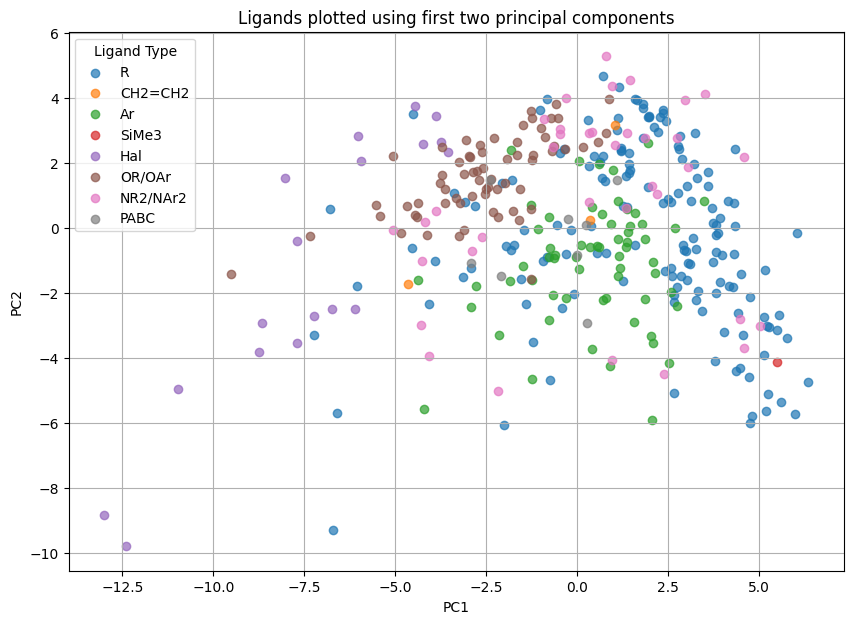

In [ ]:
ligands = pd.read_csv('data/LKB_P.csv', sep=';')
#scatter plot
plt.figure(figsize=(10, 7))
types = ligands['Type'].unique()  #all ligands are here

for t in types:
    subset = ligands[ligands['Type'] == t]
    plt.scatter(subset['PC1'], subset['PC2'], label=t, alpha=0.7)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ligands plotted using first two principal components')
plt.legend(title='Ligand Type')
plt.grid(True)
plt.show()


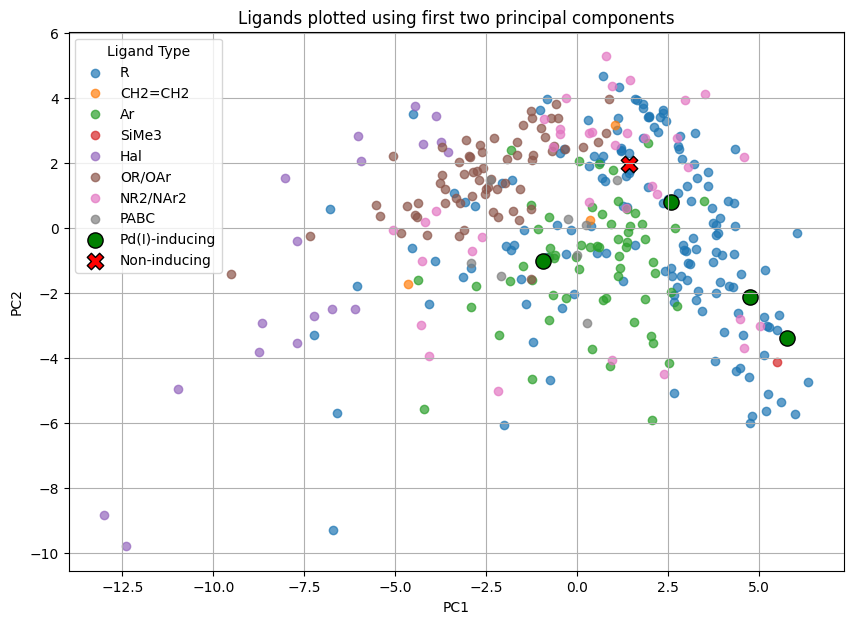

In [ ]:
pos_refs = [16, 41, 54, 113]
neg_refs = [21] # see this is known

plt.figure(figsize=(10, 7))
types = ligands['Type'].unique()

for t in types:
    subset = ligands[ligands['Type'] == t]
    plt.scatter(subset['PC1'], subset['PC2'], label=t, alpha=0.7)

plt.scatter(ligands.loc[pos_refs, 'PC1'], ligands.loc[pos_refs, 'PC2'],
            color='green', marker='o', s=120, edgecolor='black', label='Pd(I)-inducing')
plt.scatter(ligands.loc[neg_refs, 'PC1'], ligands.loc[neg_refs, 'PC2'],
            color='red', marker='X', s=140, edgecolor='black', label='Non-inducing')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Ligands plotted using first two principal components')
plt.legend(title='Ligand Type')
plt.grid(True)
plt.show()


Documentation (june 25, 2025)

No info received from doing PCA. Why?? the ligands are not in very different state or simply put their distance is quite close still having very different effects which is the magic of chemistry.
now trying clustering!

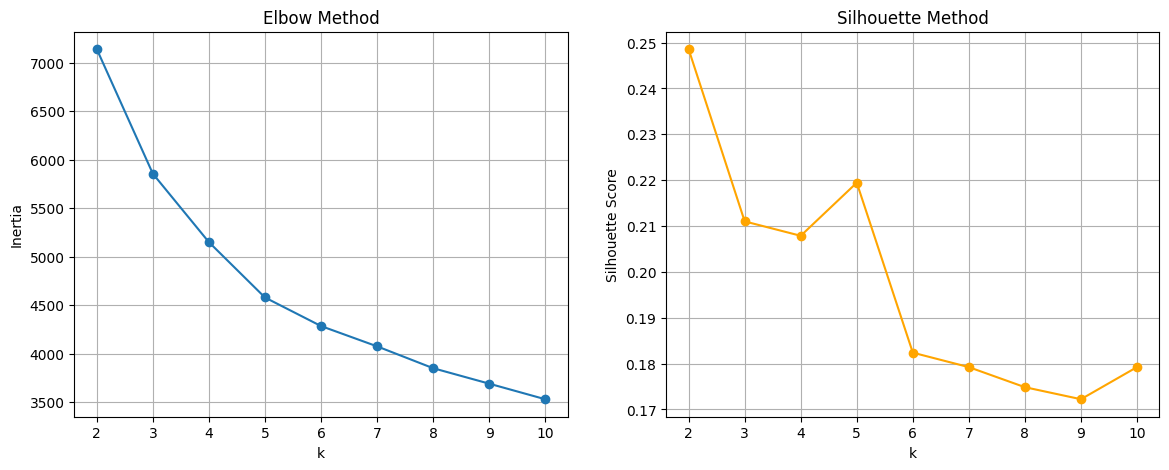

Best k based on silhouette score: 2


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ligands = pd.read_csv("data/LKB_P.csv", sep=";")

process = ['E(HOMO)', 'E(LUMO)', 'He8_steric', 'PA', 'Q(B)', 'BE(B)', 'P-B', 'DP-A(B)',
           'DA-P-A(B)', 'Q(Au)', 'BE(Au)', 'Au-Cl', 'Au-P', 'DP-A(Au)', 'DA-P-A(Au)',
           'Q(Pd)', 'BE(Pd)', 'Pd-Cl trans', 'P-Pd', 'DP-A(Pd)', 'DA-P-A(Pd)', 'Q(Pt)',
           'BE(Pt)', 'P-Pt', 'DP-A(Pt)', 'DA-P-A(Pt)', '<(H3P)Pt(PH3)', 'S4\'']
drop = ['Type', 'PC1', 'PC2', 'PC3', 'PC4']

X = ligands.drop(columns=drop)
X = X[process]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
silhouettes = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, 'o-', label='Inertia')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(K, silhouettes, 'o-', color='orange', label='Silhouette Score')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.grid(True)

plt.show()

best_k = K[np.argmax(silhouettes)]
print("Best k based on silhouette score:", best_k)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

ligands = pd.read_csv("data/LKB_P.csv", sep=";")

process = ['E(HOMO)', 'E(LUMO)', 'He8_steric', 'PA', 'Q(B)', 'BE(B)', 'P-B', 'DP-A(B)',
           'DA-P-A(B)', 'Q(Au)', 'BE(Au)', 'Au-Cl', 'Au-P', 'DP-A(Au)', 'DA-P-A(Au)',
           'Q(Pd)', 'BE(Pd)', 'Pd-Cl trans', 'P-Pd', 'DP-A(Pd)', 'DA-P-A(Pd)', 'Q(Pt)',
           'BE(Pt)', 'P-Pt', 'DP-A(Pt)', 'DA-P-A(Pt)', '<(H3P)Pt(PH3)', 'S4\'']
drop = ['Type', 'PC1', 'PC2', 'PC3', 'PC4']

X = ligands.drop(columns=drop)
X = X[process]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pos_refs = [16, 41, 54, 113]

counts = Counter()

for seed in range(1000):
    kmeans = KMeans(n_clusters=8, random_state=seed, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    pos_clusters = set(labels[pos_refs])

    same_cluster = np.where(np.isin(labels, list(pos_clusters)))[0]

    counts.update(same_cluster)

stability_df = pd.DataFrame({
    "Ligand_Index": range(len(ligands)),
    "Count_with_PdI": [counts[i] for i in range(len(ligands))]
}).sort_values(by="Count_with_PdI", ascending=False)

# Filter ligands clustered with positive references more than 75% of the time
filtered_ligands_df = stability_df[stability_df['Count_with_PdI'] > 750]

display(stability_df)
display(filtered_ligands_df)

,Ligand_Index,Count_with_PdI
309,309,1000
316,316,1000
323,323,1000
180,180,1000
44,44,1000
...,...,...
293,293,0
330,330,0
338,338,0
3,3,0


,Ligand_Index,Count_with_PdI
309,309,1000
316,316,1000
323,323,1000
180,180,1000
44,44,1000
...,...,...
339,339,775
176,176,769
169,169,765
175,175,760


In [ ]:
filtered_indices = filtered_ligands_df['Ligand_Index'].tolist()
print("Indices of ligands clustered with positive references (>75%):")
print(filtered_indices)

# Check if ligand 21 is in the filtered group (classicexample in literature)
if 21 in filtered_indices:
    print("\nLigand 21 (non-inducing) IS included in this group.")
else:
    print("\nLigand 21 (non-inducing) is NOT included in this group.")

filtered_ligand_types = ligands.loc[filtered_indices, 'Type'].unique()
print("\nLigand types in the filtered group:")
print(filtered_ligand_types)

if len(filtered_ligand_types) > 1:
    print("\nThis group of ligands contains mixed ligand types.")
else:
    print("\nThis group of ligands contains only one ligand type.")

Indices of ligands clustered with positive references (>75%):
[309, 316, 323, 180, 44, 41, 40, 292, 186, 302, 303, 178, 119, 120, 115, 113, 15, 16, 141, 60, 54, 161, 165, 167, 170, 171, 173, 122, 298, 135, 68, 139, 91, 86, 87, 64, 26, 129, 134, 341, 63, 126, 310, 342, 90, 65, 325, 99, 55, 76, 58, 127, 62, 164, 96, 103, 140, 74, 88, 89, 319, 73, 83, 19, 71, 157, 297, 94, 72, 133, 52, 82, 215, 343, 67, 92, 102, 79, 100, 77, 183, 66, 179, 128, 131, 185, 312, 339, 176, 169, 175, 98]

Ligand 21 (non-inducing) is NOT included in this group.

Ligand types in the filtered group:
['NR2/NAr2' 'R' 'Ar' 'PABC' 'CH2=CH2']

This group of ligands contains mixed ligand types.


In [ ]:

dimer_df = pd.read_csv('data/Dimer_LKB_P.csv', sep=';')
display(dimer_df.head())

,No.,Type,E(HOMO),E(LUMO),He8_steric,PA,Q(Pd),BE(Pd),Pd-Cl trans,P-Pd,...,G_NBO_Pd,G_NBO_P,G_LENGTH_Pd_P,G_LENGTH_Pd_Pd,G_TORSION_Pd_I_I_Pd,G_ORDER_Pd_Pd,PC1',PC2',PC3',PC4'
0,15,R,-0.17500,0.02350,37.82,247.52,-1.257,30.03,2.379,2.337,...,-0.379685,1.297005,2.312152,3.226557,103.059842,0.1171,-0.986788,0.414056,0.017615,-0.632639
1,16,R,-0.17267,0.02754,23.38,250.80,-1.200,23.90,2.382,2.418,...,-0.278010,1.232615,2.413734,4.305073,174.451579,0.0264,1.198717,1.162347,0.901051,-0.055612
2,19,R,-0.18340,0.01900,31.31,243.63,-1.282,28.25,2.377,2.308,...,-0.340260,1.205245,2.314010,3.620629,124.149654,0.0713,-0.146169,-0.318877,0.877642,-0.227544
3,36,R,-0.17840,0.02300,19.69,245.86,-1.275,34.79,2.379,2.321,...,-0.365385,1.280040,2.317294,3.187955,101.341176,0.1254,-1.135555,0.275201,0.181931,-0.516078
4,37,R,-0.17790,0.02220,18.53,246.58,-1.253,35.72,2.380,2.334,...,-0.387150,1.284050,2.346424,3.102411,95.391197,0.1369,-0.904739,0.447820,0.106396,-0.301205


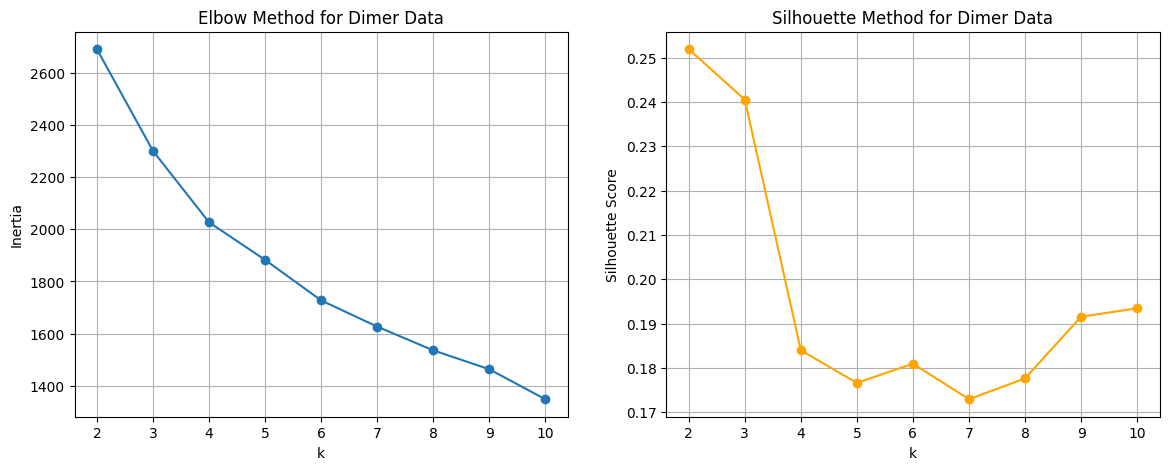

Best k based on silhouette score for dimer data: 2


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

drop = ["Type", "PC1", "PC2", "PC3", "PC4", "PC1'", "PC2'", "PC3'", "PC4'"]

X_dimer = dimer_df.drop(columns=drop)

scaler_dimer = StandardScaler()
X_dimer_scaled = scaler_dimer.fit_transform(X_dimer)

inertias_dimer = []
silhouettes_dimer = []
K_dimer = range(2, 11)

for k in K_dimer:
    kmeans_dimer = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_dimer = kmeans_dimer.fit_predict(X_dimer_scaled)
    inertias_dimer.append(kmeans_dimer.inertia_)
    silhouettes_dimer.append(silhouette_score(X_dimer_scaled, labels_dimer))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_dimer, inertias_dimer, 'o-')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method for Dimer Data")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_dimer, silhouettes_dimer, 'o-', color='orange')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Dimer Data")
plt.grid(True)

plt.show()

best_k_dimer = K_dimer[np.argmax(silhouettes_dimer)]
print("Best k based on silhouette score for dimer data:", best_k_dimer)

In [ ]:
filtered_indices_dimer = filtered_dimers_df['Ligand_Index'].tolist()
filtered_dimer_types = dimer_df.loc[filtered_indices_dimer, 'Type'].tolist()
print(filtered_dimer_types)

['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


In [ ]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
import pandas as pd

# References for positive ligands in the dimer dataset
refs = [1, 8, 18, 36] # Note: These are 'No.' values, not DataFrame indices

# Find the DataFrame indices corresponding to the 'No.' values in refs
ref_indices = dimer_df[dimer_df['No.'].isin(refs)].index.tolist()
print(f"Indices of positive references in dimer_df: {ref_indices}")

# Stability count
counts_dimer = Counter()

# Repeat clustering with 1000 random seeds
num_runs = 1000
for seed in range(num_runs):
    kmeans_dimer = KMeans(n_clusters=6, random_state=seed, n_init=10)
    labels_dimer = kmeans_dimer.fit_predict(X_dimer_scaled)

    # Find the cluster(s) containing positive references
    ref_clusters = set(labels_dimer[ref_indices])

    # Find all ligands that fall into these clusters
    same_cluster_dimer = np.where(np.isin(labels_dimer, list(ref_clusters)))[0]

    # Count occurrences
    counts_dimer.update(same_cluster_dimer)

# Convert results to DataFrame
stability_dimer_df = pd.DataFrame({
    "Ligand_Index": range(len(dimer_df)),
    "Count_with_References": [counts_dimer[i] for i in range(len(dimer_df))]
}).sort_values(by="Count_with_References", ascending=False)

# Filter ligands clustered with positive references more than  50% of the time
filtered_dimers_df = stability_dimer_df[stability_dimer_df['Count_with_References'] > num_runs * 0.5]

print("\nCluster stability results for dimer data:")
display(stability_dimer_df)

print("\nFiltered dimer ligands (clustered with references > 50%):")
display(filtered_dimers_df)

Indices of positive references in dimer_df: [3]

Cluster stability results for dimer data:


,Ligand_Index,Count_with_References
0,0,1000
3,3,1000
15,15,1000
4,4,1000
5,5,1000
...,...,...
59,59,0
61,61,0
62,62,0
63,63,0



Filtered dimer ligands (clustered with references > 50%):


,Ligand_Index,Count_with_References
0,0,1000
3,3,1000
15,15,1000
4,4,1000
5,5,1000
6,6,1000
16,16,998
7,7,996
36,36,942
10,10,898


Experimental validation

The second clustering grouped 21 new ligands together with the 4 already known Pd(I) dimer-inducer ligands. These predictions were tested experimentally, and these were the results:

8 new dimers were discovered!
 Probably, a human researcher would have discarded them, but ML was able to point out the similarities and provide meaningful counterintuitive experimental suggestions.